In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\elisa\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# import train_test_split
from sklearn.model_selection import train_test_split
# import MinMaxScaler to scale data
from sklearn.preprocessing import MinMaxScaler
# import LogisticRegression for model1
from sklearn.linear_model import LogisticRegression
# import KNeighborsClassifier for model2
from sklearn.neighbors import KNeighborsClassifier
# import for decision tree for model3
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# import GridSearch
from sklearn.model_selection import GridSearchCV

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
koi_ft = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_period','dec','koi_kepmag','koi_slogg','koi_impact']]

In [6]:
conf_cand = koi_ft[(koi_ft['koi_disposition']=='CONFIRMED') | (koi_ft['koi_disposition']=='CANDIDATE')]
conf_cand.reset_index(drop=True, inplace=True)

In [7]:
conf_cand

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,dec,koi_kepmag,koi_slogg,koi_impact
0,CONFIRMED,0,0,0,0,54.418383,48.141651,15.347,4.467,0.586
1,CONFIRMED,0,0,0,0,2.525592,48.226200,15.509,4.438,0.701
2,CONFIRMED,0,0,0,0,4.134435,48.224670,15.714,4.486,0.762
3,CONFIRMED,0,0,0,0,2.566589,48.224670,15.714,4.486,0.755
4,CONFIRMED,0,0,0,0,16.068647,48.375790,15.841,4.485,0.052
...,...,...,...,...,...,...,...,...,...,...
3482,CANDIDATE,0,0,0,0,4.736816,44.505138,13.922,4.456,0.218
3483,CANDIDATE,0,0,0,0,130.235324,44.519939,15.991,4.529,0.075
3484,CANDIDATE,0,0,0,0,8.870416,50.239178,13.579,4.027,1.206
3485,CANDIDATE,0,0,0,0,47.109631,44.920090,13.731,3.597,1.230


In [8]:
false_pos = koi_ft[koi_ft['koi_disposition']=='FALSE POSITIVE']
false_pos.reset_index(drop=True, inplace=True)

In [9]:
false_pos

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,dec,koi_kepmag,koi_slogg,koi_impact
0,FALSE POSITIVE,0,1,0,0,19.899140,48.134129,15.436,4.544,0.969
1,FALSE POSITIVE,0,1,0,0,1.736952,48.285210,15.597,4.564,1.276
2,FALSE POSITIVE,0,1,0,0,11.521446,47.597401,15.472,4.554,2.483
3,FALSE POSITIVE,0,1,0,0,19.221389,47.690350,15.341,4.496,1.065
4,FALSE POSITIVE,0,1,0,0,16.469838,47.668701,15.788,4.517,0.292
...,...,...,...,...,...,...,...,...,...,...
3499,FALSE POSITIVE,0,1,0,0,21.513523,37.966640,10.630,3.508,2.441
3500,FALSE POSITIVE,0,0,0,1,8.589871,46.973351,14.478,4.296,0.765
3501,FALSE POSITIVE,0,1,1,0,0.527699,47.093819,14.082,4.529,1.252
3502,FALSE POSITIVE,0,0,1,0,0.681402,47.176281,15.385,4.447,0.147


In [12]:
split_false_pos = false_pos.sample(frac=0.5, random_state=12)
split_false_pos

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,dec,koi_kepmag,koi_slogg,koi_impact
2259,FALSE POSITIVE,0,1,0,0,4.817122,48.927292,15.973,4.581,1.233
2664,FALSE POSITIVE,0,1,0,0,9.058488,46.856628,15.507,4.671,0.213
1177,FALSE POSITIVE,0,1,0,0,114.908624,38.595661,15.927,4.565,0.780
2086,FALSE POSITIVE,1,0,1,1,12.425571,40.674290,14.961,4.564,0.984
2705,FALSE POSITIVE,0,1,1,0,0.922031,40.014961,14.351,4.386,1.242
...,...,...,...,...,...,...,...,...,...,...
466,FALSE POSITIVE,0,1,0,0,14.407903,44.281231,14.599,4.617,1.226
1421,FALSE POSITIVE,1,0,0,0,371.149500,43.133240,15.342,4.541,0.228
2910,FALSE POSITIVE,0,1,1,0,0.646745,50.336540,15.212,4.409,0.942
286,FALSE POSITIVE,0,1,1,1,17.042135,43.404411,15.570,4.590,0.784


In [14]:
koi_ft_balanced = conf_cand.append(split_false_pos)
koi_ft_balanced

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,dec,koi_kepmag,koi_slogg,koi_impact
0,CONFIRMED,0,0,0,0,54.418383,48.141651,15.347,4.467,0.586
1,CONFIRMED,0,0,0,0,2.525592,48.226200,15.509,4.438,0.701
2,CONFIRMED,0,0,0,0,4.134435,48.224670,15.714,4.486,0.762
3,CONFIRMED,0,0,0,0,2.566589,48.224670,15.714,4.486,0.755
4,CONFIRMED,0,0,0,0,16.068647,48.375790,15.841,4.485,0.052
...,...,...,...,...,...,...,...,...,...,...
466,FALSE POSITIVE,0,1,0,0,14.407903,44.281231,14.599,4.617,1.226
1421,FALSE POSITIVE,1,0,0,0,371.149500,43.133240,15.342,4.541,0.228
2910,FALSE POSITIVE,0,1,1,0,0.646745,50.336540,15.212,4.409,0.942
286,FALSE POSITIVE,0,1,1,1,17.042135,43.404411,15.570,4.590,0.784


# Create a Train Test Split

Use `koi_disposition` for the y values

In [15]:
# Assign X and y values
X = koi_ft_balanced.drop('koi_disposition',axis=1)
y = koi_ft_balanced['koi_disposition']

In [16]:
# Use train_test_split to create test and train sets of data
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=12)

In [17]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,dec,koi_kepmag,koi_slogg,koi_impact
369,0,0,0,1,6.383157,49.960892,15.554,4.623,0.029
22,0,0,0,0,41.439587,49.017342,15.400,4.367,0.355
2088,0,0,0,0,44.622673,41.455391,13.519,4.252,0.931
991,1,0,0,0,0.779579,43.811432,15.703,4.553,0.183
2363,0,0,0,0,3.380805,44.312180,15.514,4.343,0.067


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [18]:
# Scale data using MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



### Logistic Regression

In [19]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
classifier.fit(X_train,y_train)

C:\Users\elisa\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7017052685161619
Testing Data Score: 0.7183206106870229


In [22]:
predictions = classifier.predict(X_test)

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['CANDIDATE' 'CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE'
 'FALSE POSITIVE' 'CONFIRMED' 'CANDIDATE' 'CONFIRMED' 'CONFIRMED']
First 10 Actual labels: ['CONFIRMED', 'CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE', 'CONFIRMED', 'CANDIDATE']


In [23]:
model1 = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

### K Nearest Neighbors

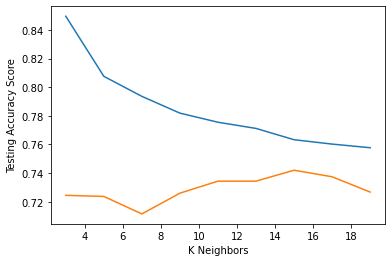

In [24]:
train_scores = []
test_scores = []
for k in range(3, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(range(3,20,2), train_scores)
plt.plot(range(3,20,2), test_scores)
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.742


### Decision Tree

In [26]:
clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train_scaled, y_train)
print('Train score: {}'.format(clf.score(X_train_scaled, y_train)))
print('Test score: {}'.format(clf.score(X_test_scaled, y_test)))

Train score: 0.7592262662255027
Test score: 0.7229007633587786


### Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=45)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.7763358778625954

In [28]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.1648919422553128, 'koi_fpflag_ss'),
 (0.13277558995646024, 'koi_period'),
 (0.1299691587964547, 'koi_fpflag_nt'),
 (0.11801634332237841, 'koi_impact'),
 (0.10999353444352372, 'koi_fpflag_co'),
 (0.10755324942482754, 'koi_slogg'),
 (0.1025690742076485, 'koi_kepmag'),
 (0.09684661626792986, 'dec'),
 (0.03738449132546417, 'koi_fpflag_ec')]

In [29]:
# Best Model Score
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7763358778625954


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [30]:
# Create the GridSearchCV model
param_grid = {'n_estimators':[100,200,300,400,500],
             'min_samples_leaf':[1,2,3,4]}

In [31]:
# Train the model with GridSearch
grid = GridSearchCV(RandomForestClassifier(),param_grid,verbose=3)

In [32]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=1, n_estimators=100, score=0.742, total=   0.6s
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  min_samples_leaf=1, n_estimators=100, score=0.746, total=   0.6s
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  min_samples_leaf=1, n_estimators=100, score=0.752, total=   0.6s
[CV] min_samples_leaf=1, n_estimators=100 ............................
[CV]  min_samples_leaf=1, n_estimators=100, score=0.728, total=   0.5s
[CV] min_samples_leaf=1, n_estimators=100 ............................
[CV]  min_samples_leaf=1, n_estimators=100, score=0.744, total=   0.5s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.753, total=   1.1s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.756, total=   1.1s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.767, total=   1.1s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.734, total=   1.1s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  

[CV]  min_samples_leaf=3, n_estimators=300, score=0.760, total=   1.6s
[CV] min_samples_leaf=3, n_estimators=300 ............................
[CV]  min_samples_leaf=3, n_estimators=300, score=0.753, total=   1.5s
[CV] min_samples_leaf=3, n_estimators=300 ............................
[CV]  min_samples_leaf=3, n_estimators=300, score=0.772, total=   1.6s
[CV] min_samples_leaf=3, n_estimators=300 ............................
[CV]  min_samples_leaf=3, n_estimators=300, score=0.739, total=   1.5s
[CV] min_samples_leaf=3, n_estimators=300 ............................
[CV]  min_samples_leaf=3, n_estimators=300, score=0.741, total=   1.5s
[CV] min_samples_leaf=3, n_estimators=400 ............................
[CV]  min_samples_leaf=3, n_estimators=400, score=0.761, total=   2.1s
[CV] min_samples_leaf=3, n_estimators=400 ............................
[CV]  min_samples_leaf=3, n_estimators=400, score=0.754, total=   2.1s
[CV] min_samples_leaf=3, n_estimators=400 ............................
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'min_samples_leaf': 3, 'n_estimators': 400}
0.7543880974376428


## Classification Report

In [34]:
predictions = grid.predict(X_test_scaled)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.68      0.54      0.61       423
     CONFIRMED       0.63      0.74      0.68       435
FALSE POSITIVE       0.97      1.00      0.98       452

      accuracy                           0.77      1310
     macro avg       0.76      0.76      0.76      1310
  weighted avg       0.77      0.77      0.76      1310



# Save the Model

In [38]:
# save model
import joblib
filename = 'elisabethVirak_cut.sav'
joblib.dump(grid, filename)

['elisabethVirak_cut.sav']